# Analysis of Faker Data

This notebook performs an analysis of the `fakerdata` table from the `kafkapipeline` Cassandra keyspace. We'll explore personal attributes like age, gender, income, and monthly purchases, and visualize the data to uncover patterns or trends.

---

## 1. Setup and Import Libraries


In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cassandrautils import getDF  # Assuming getDF is a utility function to fetch data from Cassandra

# Set Seaborn style for better visualizations
sns.set(style="whitegrid")

# Retrieve the fakerdata table from Cassandra
df_faker = getDF('fakerdata')

# Display the first few rows of the dataframe to get an overview of the data
df_faker.head()

,name,age,avg_purchase_amount,city,country,credit_card_expire,credit_card_number,credit_card_provider,credit_card_security_code,gender,income,job,monthly_purchases,postcode,ssn,street_name
0,Jodi Smith,50,146.949997,Christopherborough,British Indian Ocean Territory (Chagos Archipe...,08/29,4223659242800882,JCB 16 digit,786,Female,48317.0,Historic buildings inspector/conservation officer,35,59680,097-24-1495,Richardson Lake
1,Tiffany Sellers,36,171.589996,Barronville,Martinique,08/34,2223740725718827,JCB 16 digit,290,Female,172264.0,"Engineer, water",22,93783,755-81-3430,Hannah Land
2,Christopher Mason,29,335.989990,Jacksonburgh,Lao People's Democratic Republic,09/25,3577305015791429,JCB 15 digit,074,Male,114583.0,Water quality scientist,13,92200,053-15-9594,Monroe Land
3,Dr. Henry Sexton Jr.,28,455.029999,Baxterside,Uganda,04/30,6572079603891168,JCB 16 digit,022,Male,192055.0,Medical laboratory scientific officer,39,64118,884-72-6575,David Ports
4,Cynthia Ryan,56,199.320007,Tiffanytown,Equatorial Guinea,09/29,30017569944810,VISA 16 digit,598,Female,139427.0,Chief Technology Officer,27,92247,445-86-5245,Wise Forge


## 2. Data Overview and Descriptive Statistics

Let's begin by looking at the basic statistics of the dataset. We'll examine columns like `age`, `income`, and `monthly_purchases`.

In [2]:
# Get basic descriptive statistics of the dataset
df_faker.describe()

,age,avg_purchase_amount,income,monthly_purchases
count,45.000000,45.000000,45.000000,45.000000
mean,41.866667,281.361555,116748.355556,25.333333
std,14.711776,141.796791,40405.400937,14.807860
min,19.000000,5.660000,37230.000000,0.000000
25%,28.000000,172.350006,92482.000000,13.000000
50%,40.000000,276.959991,115616.000000,25.000000
75%,57.000000,402.540009,144242.000000,40.000000
max,68.000000,499.290009,192055.000000,49.000000


## 3. Visualizing Key Attributes

Now, let's create some visualizations to understand the distribution of key attributes like `income`, `age`, `monthly_purchases`, and `avg_purchase_amount`.

### Distribution of Income

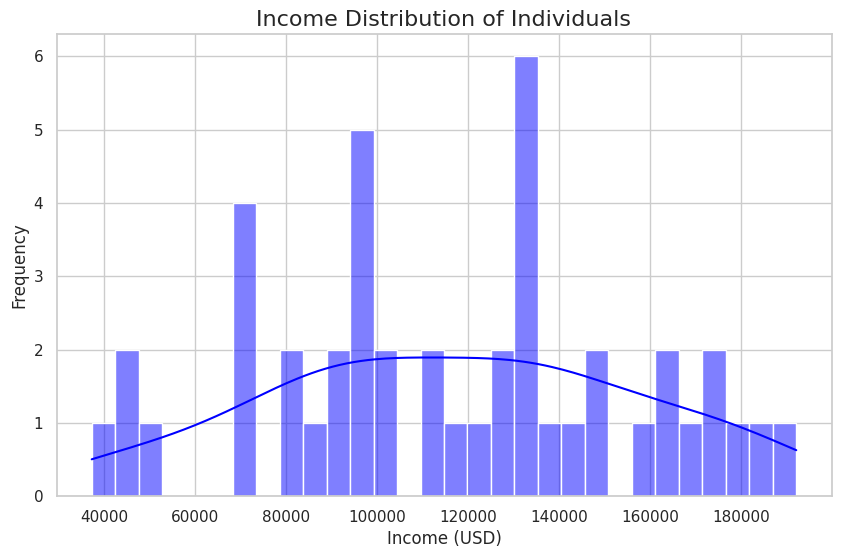

In [3]:
# Plotting the distribution of income
plt.figure(figsize=(10, 6))
sns.histplot(df_faker['income'], kde=True, color='blue', bins=30)

# Customize the plot
plt.title('Income Distribution of Individuals', fontsize=16)
plt.xlabel('Income (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


### Age Distribution

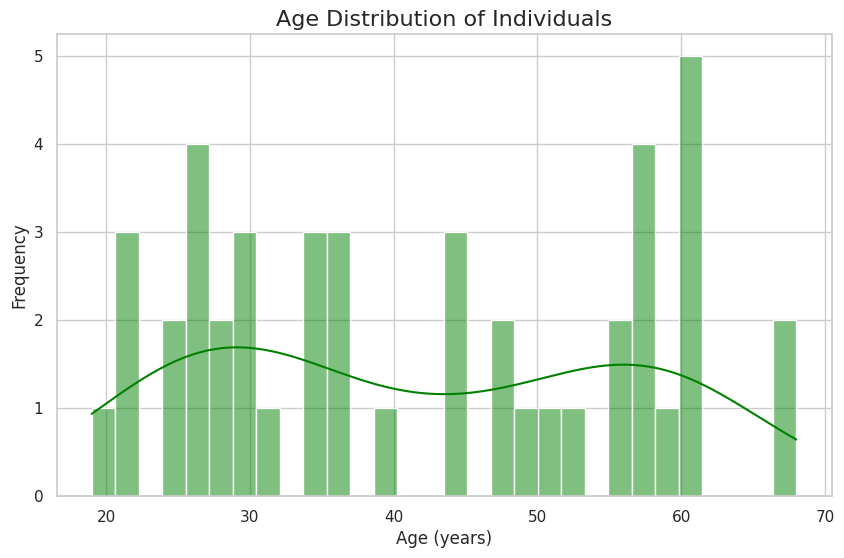

In [4]:
# Plotting the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df_faker['age'], kde=True, color='green', bins=30)

# Customize the plot
plt.title('Age Distribution of Individuals', fontsize=16)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


### Monthy Purchases

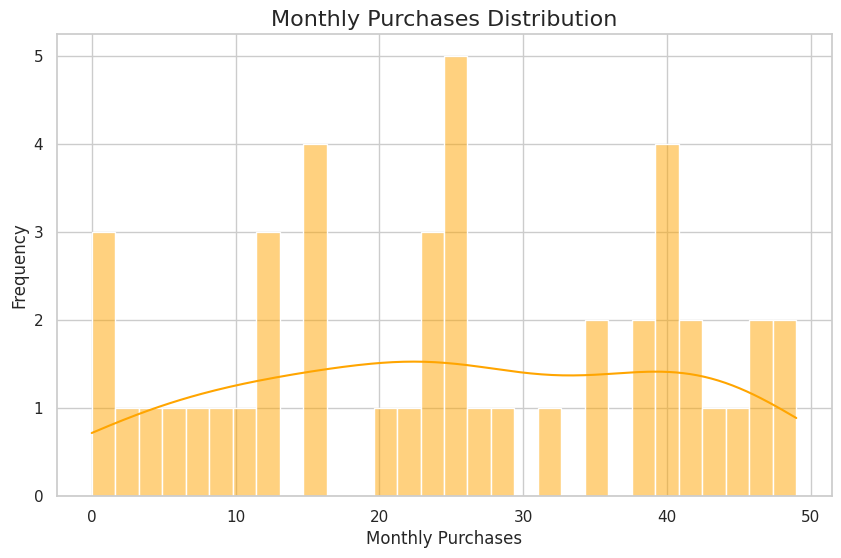

In [5]:
# Plotting the distribution of monthly purchases
plt.figure(figsize=(10, 6))
sns.histplot(df_faker['monthly_purchases'], kde=True, color='orange', bins=30)

# Customize the plot
plt.title('Monthly Purchases Distribution', fontsize=16)
plt.xlabel('Monthly Purchases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


### Average Purchase Amount

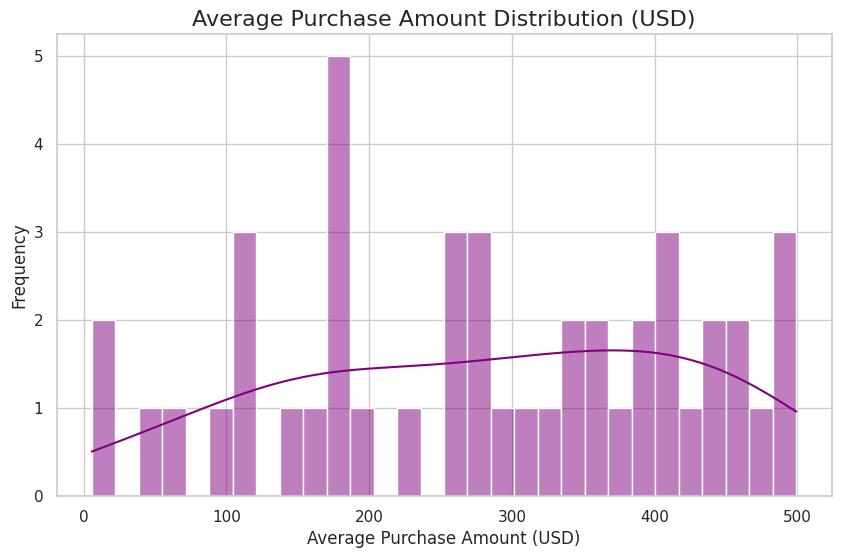

In [6]:
# Plotting the distribution of average purchase amount
plt.figure(figsize=(10, 6))
sns.histplot(df_faker['avg_purchase_amount'], kde=True, color='purple', bins=30)

# Customize the plot
plt.title('Average Purchase Amount Distribution (USD)', fontsize=16)
plt.xlabel('Average Purchase Amount (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


## 4. Comparing Income and Monthly Purchases

Now, let's explore whether there is a correlation between an individual's **income** and their **monthly purchases**. We can visualize this relationship using a scatter plot.


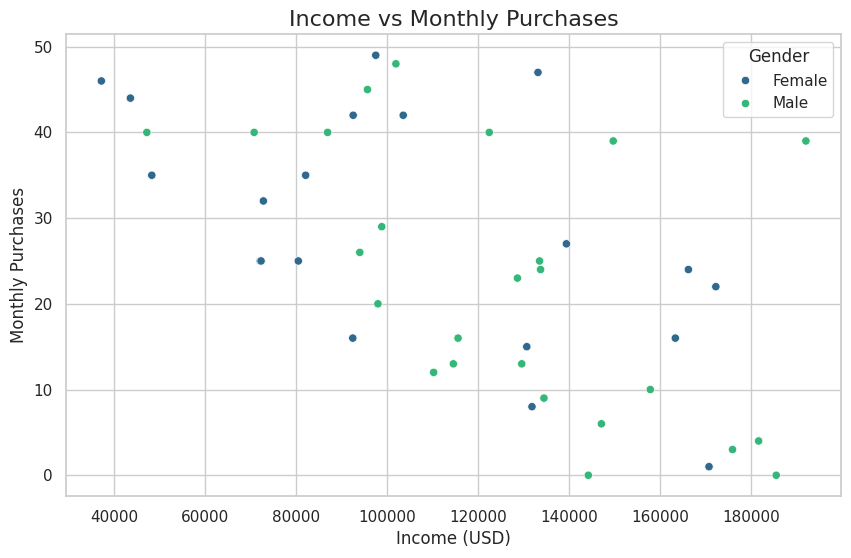

In [7]:
# Scatter plot of income vs. monthly purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='monthly_purchases', data=df_faker, hue='gender', palette='viridis')

# Customize the plot
plt.title('Income vs Monthly Purchases', fontsize=16)
plt.xlabel('Income (USD)', fontsize=12)
plt.ylabel('Monthly Purchases', fontsize=12)
plt.legend(title='Gender')

# Show the plot
plt.show()


## 5. Gender-wise Income Comparison

Let's now visualize how income differs between genders using a boxplot.


/tmp/ipykernel_336/257804308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='income', data=df_faker, palette='coolwarm')


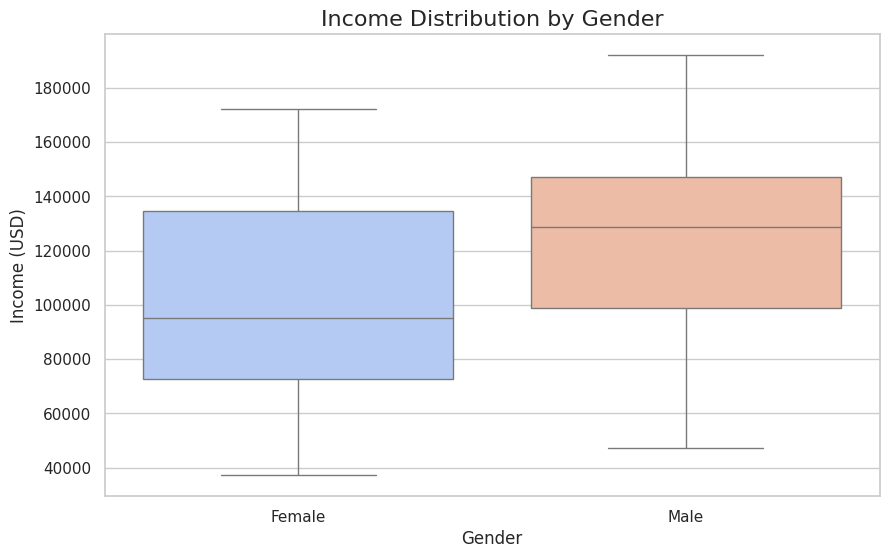

In [8]:
# Boxplot to compare income across genders
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=df_faker, palette='coolwarm')

# Customize the plot
plt.title('Income Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Income (USD)', fontsize=12)

# Show the plot
plt.show()
